In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import functools as ft
import collections as cls

def stat_method(function, iterations=100000):
    counter, x, y  = [], [], []
    for i in range(iterations):
        function(counter, x, y)
    df = pd.DataFrame({
        'x': x,
        'y': y,
        'target': counter
    })
    return df


def stats(counter, factor=None, title='Data Statistics'):
    counter = Counter(counter)
    amount = sum(counter.values())
    new_counter = { 'amount': amount}
    print('----- '+ title +' -----')
    for value in counter:
        share = counter[value] / amount
        print('Share for value "' + str(value) + '": ' + str(share))
        new_counter[value] = { 
            'amount': counter[value],
            'share': share
        }
    if factor:
        print('Area: ' + str(new_counter['in']['share'] * factor))
    print((len(title) + 12) * '-')
    return new_counter
    
    
def count_visualise(counter, labels={'x': 'First feature', 'y': 'Second feature'}, type='both'):
    if type == 'both':
        _, axes = plt.subplots(1, 2, figsize=(18, 9))
        index = [0, 1]
    else:
        _, axes = plt.subplots(figsize=(7, 7))
        index = [0]
    
    if type == 'both' or type == 'one':
        values_counter = sns.countplot(counter['target'], color='#999999', ax=axes if type != 'both' else axes[0])
        values_counter.set_xlabel('Values')
        values_counter.set_ylabel('Number of values')
        values_counter.set_title('Count different values')
    if type == 'both' or type == 'two':
        scatter_values = sns.scatterplot(x='x', y='y', hue='target', data=counter, ax=axes if type != 'both' else axes[1], s=20)
        scatter_values.set_xlabel(labels['x'])
        scatter_values.set_ylabel(labels['y'])
        scatter_values.set_title('Show values on plane')
        scatter_values.set_aspect('equal')

----- Data Statistics -----
Share for value "in": 0.78567
Share for value "out": 0.21433
Area: 0.78567
---------------------------


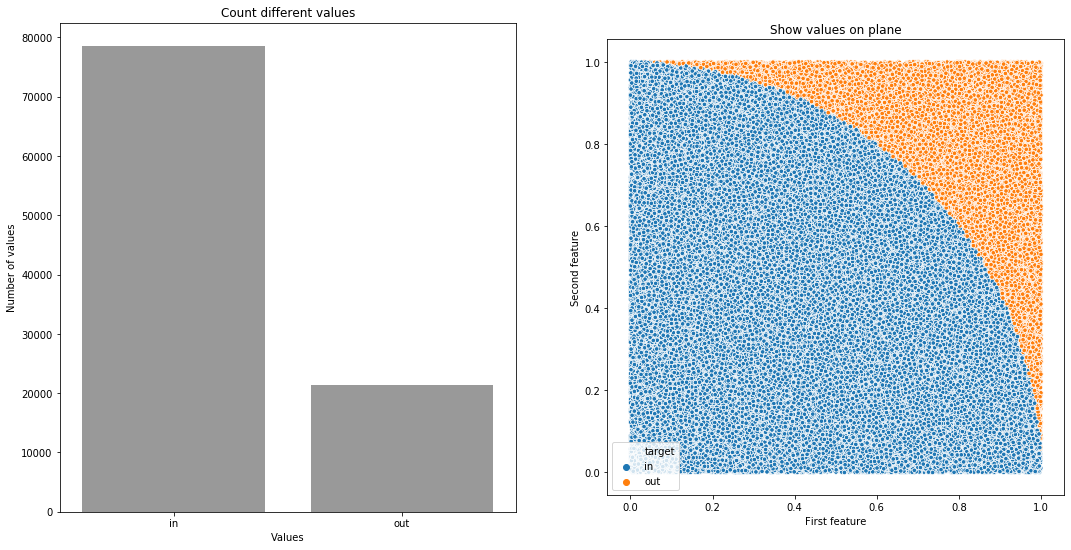

In [9]:
def quadrant(counter, x, y, target):
    coordinate_1 = random.random() * target
    coordinate_2 = random.random() * target
    predict = np.sqrt(coordinate_1 ** 2 + coordinate_2 ** 2)
    counter.append('in' if predict <= target else 'out') 
    x.append(coordinate_1)
    y.append(coordinate_2)

    
target = 1    
counter = stat_method(function=ft.partial(quadrant, target=target))
stats(counter['target'], target ** 2)
count_visualise(counter)

----- Data Statistics -----
Share for value "out": 0.36484
Share for value "in": 0.63516
Area: 1.9954139898540928
---------------------------


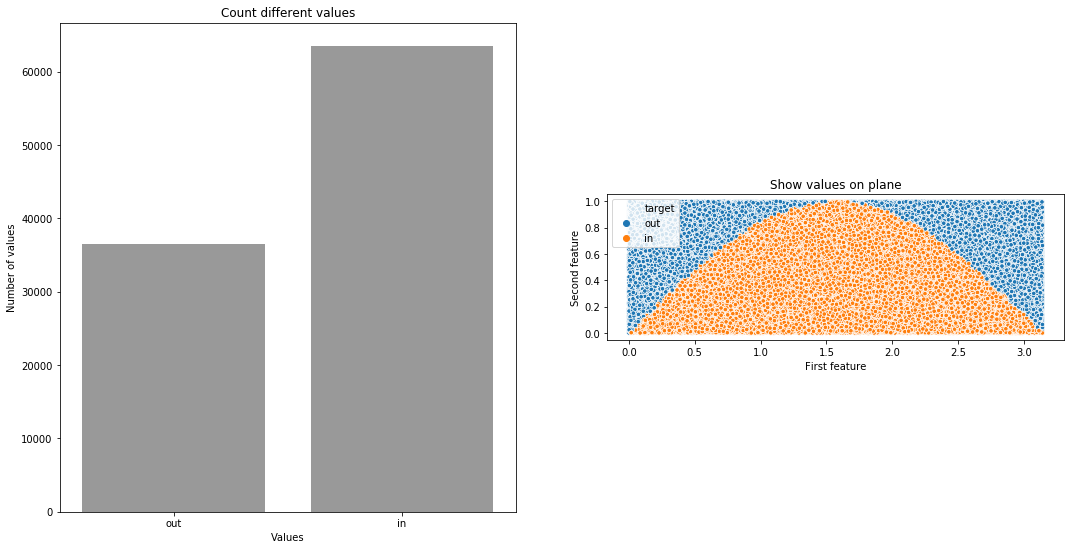

In [10]:
def target_sin(counter, x, y, border):
    coordinate_1 = random.random() * border
    predict = random.random()
    target = np.sin(coordinate_1)
    counter.append('in' if predict <= target else 'out') 
    x.append(coordinate_1)
    y.append(predict)
    
counter = stat_method(function=ft.partial(target_sin, border=np.pi))
stats(counter['target'], np.pi)
count_visualise(counter)

----- Data Statistics -----
Share for value "out": 0.21289
Share for value "in": 0.78711
Area: 1.57422
---------------------------


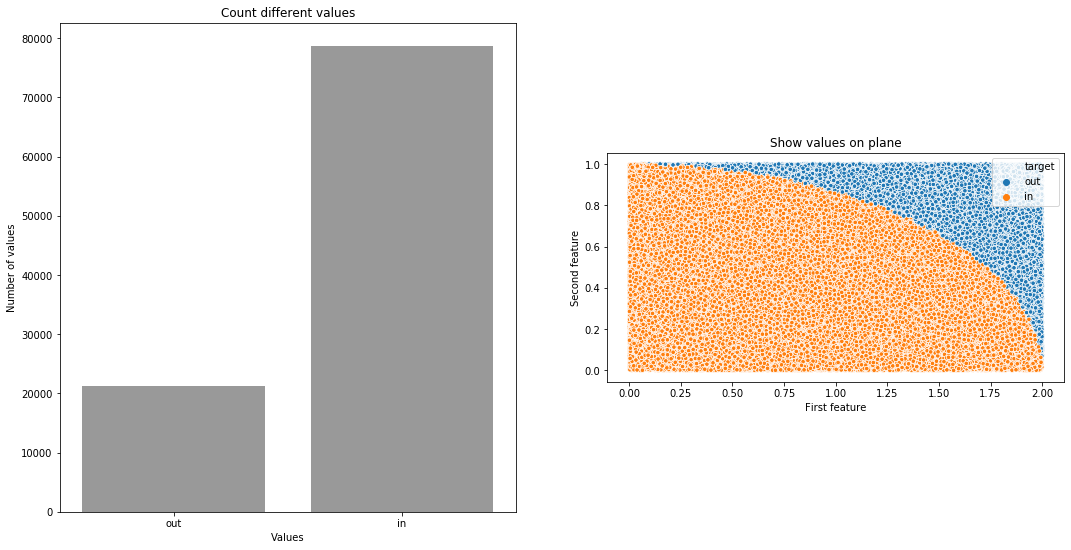

In [11]:
def elips(counter, x, y, a, b):
    coordinate_1 = random.random() * a
    coordinate_2 = random.random() * b
    predict = (coordinate_1 / a) ** 2 + (coordinate_2 / b) ** 2
    counter.append('in' if predict <= 1 else 'out') 
    x.append(coordinate_1)
    y.append(coordinate_2)
    
a, b = 2, 1  
counter = stat_method(function=ft.partial(elips, a=a, b=b))
statistics = stats(counter['target'], a * b)
count_visualise(counter)

----- Data Statistics -----
Share for value "miss": 0.56267
Share for value "Hi!": 0.43733
---------------------------


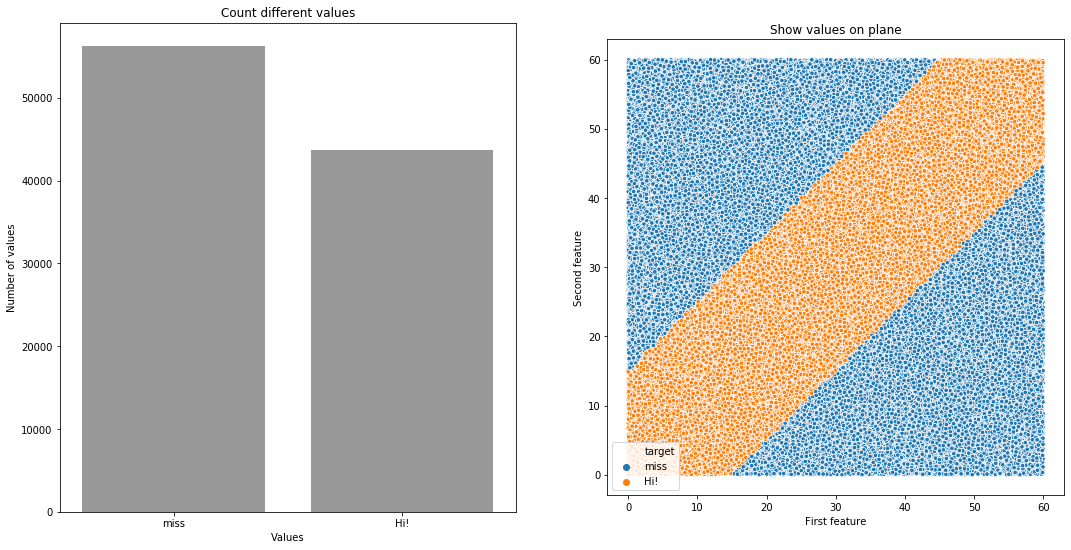

In [12]:
def hi_miss(counter, x, y, time, waiting):
    coordinate_1 = random.random() * time
    coordinate_2 = random.random() * time
    predict = np.abs(coordinate_1 - coordinate_2)
    counter.append('Hi!' if predict <= waiting else 'miss') 
    x.append(coordinate_1)
    y.append(coordinate_2)

counter = stat_method(function=ft.partial(hi_miss, time=60, waiting=15))
stats(counter['target'])
count_visualise(counter)

In [45]:
x, y = list(range(1, 61)), []
for i in x:
    counter = stat_method(function=ft.partial(hi_miss, time=60, waiting=i))
    statistics = stats(counter['target'])
    y.append(statistics['Hi!']['share'])

----- Data Statistics -----
Share for value "miss": 0.96687
Share for value "Hi!": 0.03313
---------------------------
----- Data Statistics -----
Share for value "miss": 0.93507
Share for value "Hi!": 0.06493
---------------------------
----- Data Statistics -----
Share for value "miss": 0.90251
Share for value "Hi!": 0.09749
---------------------------
----- Data Statistics -----
Share for value "Hi!": 0.12897
Share for value "miss": 0.87103
---------------------------
----- Data Statistics -----
Share for value "miss": 0.83975
Share for value "Hi!": 0.16025
---------------------------
----- Data Statistics -----
Share for value "miss": 0.80844
Share for value "Hi!": 0.19156
---------------------------
----- Data Statistics -----
Share for value "Hi!": 0.21808
Share for value "miss": 0.78192
---------------------------
----- Data Statistics -----
Share for value "miss": 0.75116
Share for value "Hi!": 0.24884
---------------------------
----- Data Statistics -----
Share for value "mis

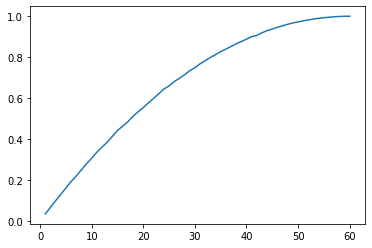

In [46]:
plt.plot(x, y)

In [35]:
def choice(counter, x, y):
    born = random.choice(['boy', 'girl'])
    counter.append(born) 
    x.append(born)
    y.append(born)
    

boys = 1359671
girls = 1285086
amount = boys + girls
practice_ver = boys / amount
vera = [practice_ver] 
for i in range(500):
    counter = stat_method(function=ft.partial(choice), iterations=amount)
    statistics = stats(counter['target'], title='Iteration ' + str(i + 1))
    vera.append(statistics['boy']['share'])

----- Iteration 1 -----
Share for value "boy": 0.5003544749101714
Share for value "girl": 0.4996455250898287
-----------------------
----- Iteration 2 -----
Share for value "girl": 0.4997604694873669
Share for value "boy": 0.5002395305126331
-----------------------
----- Iteration 3 -----
Share for value "boy": 0.4998523493840833
Share for value "girl": 0.5001476506159167
-----------------------
----- Iteration 4 -----
Share for value "girl": 0.5001767648218721
Share for value "boy": 0.4998232351781279
-----------------------
----- Iteration 5 -----
Share for value "boy": 0.49989431921344757
Share for value "girl": 0.5001056807865524
-----------------------
----- Iteration 6 -----
Share for value "boy": 0.49966216177894607
Share for value "girl": 0.5003378382210539
-----------------------
----- Iteration 7 -----
Share for value "boy": 0.5002293216352202
Share for value "girl": 0.49977067836477984
-----------------------
----- Iteration 8 -----
Share for value "girl": 0.5006754873888225

----- Iteration 62 -----
Share for value "girl": 0.5000701387688926
Share for value "boy": 0.49992986123110744
------------------------
----- Iteration 63 -----
Share for value "boy": 0.5000485866943541
Share for value "girl": 0.49995141330564585
------------------------
----- Iteration 64 -----
Share for value "girl": 0.49969127598490143
Share for value "boy": 0.5003087240150985
------------------------
----- Iteration 65 -----
Share for value "girl": 0.5000606861046213
Share for value "boy": 0.49993931389537866
------------------------
----- Iteration 66 -----
Share for value "girl": 0.5001801677810097
Share for value "boy": 0.49981983221899023
------------------------
----- Iteration 67 -----
Share for value "boy": 0.5003314104093495
Share for value "girl": 0.49966858959065047
------------------------
----- Iteration 68 -----
Share for value "boy": 0.500593816369519
Share for value "girl": 0.499406183630481
------------------------
----- Iteration 69 -----
Share for value "boy": 0.5

----- Iteration 123 -----
Share for value "boy": 0.4999956517744352
Share for value "girl": 0.5000043482255647
-------------------------
----- Iteration 124 -----
Share for value "boy": 0.4997789967093385
Share for value "girl": 0.5002210032906614
-------------------------
----- Iteration 125 -----
Share for value "girl": 0.500036487284087
Share for value "boy": 0.49996351271591305
-------------------------
----- Iteration 126 -----
Share for value "girl": 0.49980206121016035
Share for value "boy": 0.5001979387898396
-------------------------
----- Iteration 127 -----
Share for value "boy": 0.5004966429808108
Share for value "girl": 0.4995033570191893
-------------------------
----- Iteration 128 -----
Share for value "girl": 0.49977294700420494
Share for value "boy": 0.5002270529957951
-------------------------
----- Iteration 129 -----
Share for value "girl": 0.49954230199598676
Share for value "boy": 0.5004576980040132
-------------------------
----- Iteration 130 -----
Share for va

----- Iteration 183 -----
Share for value "boy": 0.5000663577031841
Share for value "girl": 0.4999336422968159
-------------------------
----- Iteration 184 -----
Share for value "girl": 0.49983722512124934
Share for value "boy": 0.5001627748787507
-------------------------
----- Iteration 185 -----
Share for value "boy": 0.5001831926335766
Share for value "girl": 0.4998168073664235
-------------------------
----- Iteration 186 -----
Share for value "boy": 0.49958956531734294
Share for value "girl": 0.500410434682657
-------------------------
----- Iteration 187 -----
Share for value "girl": 0.49985877719578775
Share for value "boy": 0.5001412228042122
-------------------------
----- Iteration 188 -----
Share for value "girl": 0.5006323832397457
Share for value "boy": 0.4993676167602543
-------------------------
----- Iteration 189 -----
Share for value "boy": 0.4994749990263756
Share for value "girl": 0.5005250009736244
-------------------------
----- Iteration 190 -----
Share for val

----- Iteration 243 -----
Share for value "boy": 0.4999143588617026
Share for value "girl": 0.5000856411382973
-------------------------
----- Iteration 244 -----
Share for value "boy": 0.5001177801968196
Share for value "girl": 0.4998822198031804
-------------------------
----- Iteration 245 -----
Share for value "boy": 0.5001688245838842
Share for value "girl": 0.4998311754161157
-------------------------
----- Iteration 246 -----
Share for value "boy": 0.4999691843144758
Share for value "girl": 0.5000308156855242
-------------------------
----- Iteration 247 -----
Share for value "boy": 0.4999816618313138
Share for value "girl": 0.5000183381686862
-------------------------
----- Iteration 248 -----
Share for value "girl": 0.500546174941592
Share for value "boy": 0.499453825058408
-------------------------
----- Iteration 249 -----
Share for value "boy": 0.4996893854520472
Share for value "girl": 0.5003106145479528
-------------------------
----- Iteration 250 -----
Share for value "

----- Iteration 303 -----
Share for value "boy": 0.5001487849356292
Share for value "girl": 0.49985121506437075
-------------------------
----- Iteration 304 -----
Share for value "girl": 0.5001650435181758
Share for value "boy": 0.49983495648182424
-------------------------
----- Iteration 305 -----
Share for value "boy": 0.5002213813972324
Share for value "girl": 0.4997786186027677
-------------------------
----- Iteration 306 -----
Share for value "boy": 0.5003257388107868
Share for value "girl": 0.4996742611892132
-------------------------
----- Iteration 307 -----
Share for value "boy": 0.4995562919391082
Share for value "girl": 0.5004437080608918
-------------------------
----- Iteration 308 -----
Share for value "boy": 0.5000882878842934
Share for value "girl": 0.4999117121157067
-------------------------
----- Iteration 309 -----
Share for value "girl": 0.5002463364309084
Share for value "boy": 0.4997536635690916
-------------------------
----- Iteration 310 -----
Share for val

----- Iteration 363 -----
Share for value "girl": 0.5008781525107978
Share for value "boy": 0.49912184748920224
-------------------------
----- Iteration 364 -----
Share for value "boy": 0.4995415457828451
Share for value "girl": 0.500458454217155
-------------------------
----- Iteration 365 -----
Share for value "boy": 0.5000470742680707
Share for value "girl": 0.49995292573192923
-------------------------
----- Iteration 366 -----
Share for value "boy": 0.5003212015319366
Share for value "girl": 0.4996787984680634
-------------------------
----- Iteration 367 -----
Share for value "boy": 0.5003540968036004
Share for value "girl": 0.4996459031963995
-------------------------
----- Iteration 368 -----
Share for value "boy": 0.4999831742575972
Share for value "girl": 0.5000168257424028
-------------------------
----- Iteration 369 -----
Share for value "boy": 0.49980357363644373
Share for value "girl": 0.5001964263635563
-------------------------
----- Iteration 370 -----
Share for val

----- Iteration 423 -----
Share for value "girl": 0.49981831979270686
Share for value "boy": 0.5001816802072931
-------------------------
----- Iteration 424 -----
Share for value "girl": 0.4998383594409619
Share for value "boy": 0.5001616405590381
-------------------------
----- Iteration 425 -----
Share for value "girl": 0.5001563470670463
Share for value "boy": 0.49984365293295374
-------------------------
----- Iteration 426 -----
Share for value "boy": 0.49954494874198274
Share for value "girl": 0.5004550512580173
-------------------------
----- Iteration 427 -----
Share for value "boy": 0.5000206068081113
Share for value "girl": 0.4999793931918887
-------------------------
----- Iteration 428 -----
Share for value "boy": 0.5000610642111922
Share for value "girl": 0.4999389357888078
-------------------------
----- Iteration 429 -----
Share for value "girl": 0.5002251624629408
Share for value "boy": 0.49977483753705915
-------------------------
----- Iteration 430 -----
Share for v

----- Iteration 483 -----
Share for value "girl": 0.5001472725093459
Share for value "boy": 0.4998527274906541
-------------------------
----- Iteration 484 -----
Share for value "boy": 0.4997687878319256
Share for value "girl": 0.5002312121680744
-------------------------
----- Iteration 485 -----
Share for value "boy": 0.49992003046026534
Share for value "girl": 0.5000799695397347
-------------------------
----- Iteration 486 -----
Share for value "girl": 0.5002436896849124
Share for value "boy": 0.49975631031508755
-------------------------
----- Iteration 487 -----
Share for value "boy": 0.5003053210559609
Share for value "girl": 0.4996946789440391
-------------------------
----- Iteration 488 -----
Share for value "boy": 0.5001113523851152
Share for value "girl": 0.49988864761488483
-------------------------
----- Iteration 489 -----
Share for value "girl": 0.5000429150957915
Share for value "boy": 0.4999570849042086
-------------------------
----- Iteration 490 -----
Share for va

In [49]:
df = pd.DataFrame({
    'i': list(range(501)),
    'target': vera
})
df.to_csv('choice.csv', index=False)

In [4]:
df = pd.read_csv('choice.csv')
statistics = df['target'].describe()
statistics

count    501.000000
mean       0.500036
std        0.000700
min        0.499056
25%        0.499820
50%        0.499983
75%        0.500206
max        0.514101
Name: target, dtype: float64

In [5]:
statistics['std'] * 3

0.002100781563499436

In [6]:
df['target'].min(), df['target'][1:].max()

(0.4990564350524453, 0.5009072667167532)

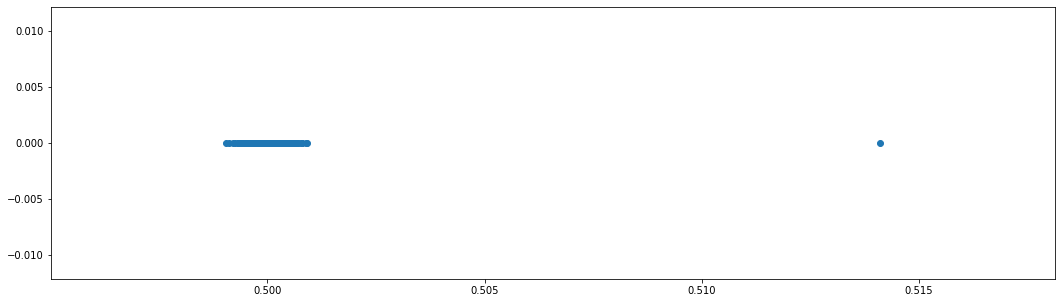

In [8]:
_, axes = plt.subplots(figsize=(18, 5))
plt.scatter(df['target'], [0 for _ in range(len(df['target']))])

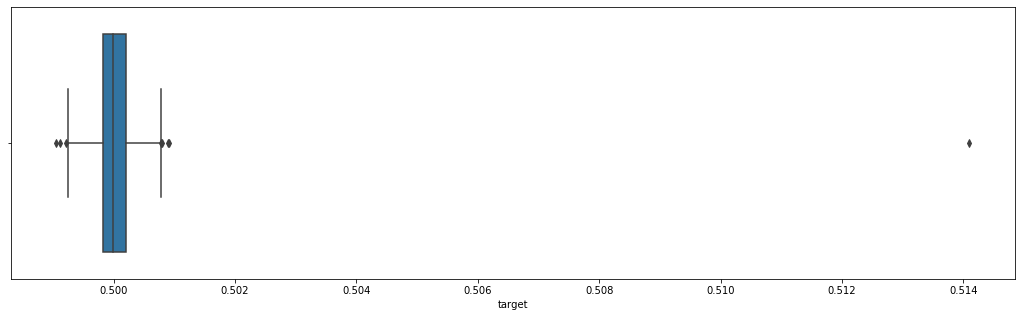

In [9]:
_, axes = plt.subplots(figsize=(18, 5))
sns.boxplot(df['target'], ax=axes)

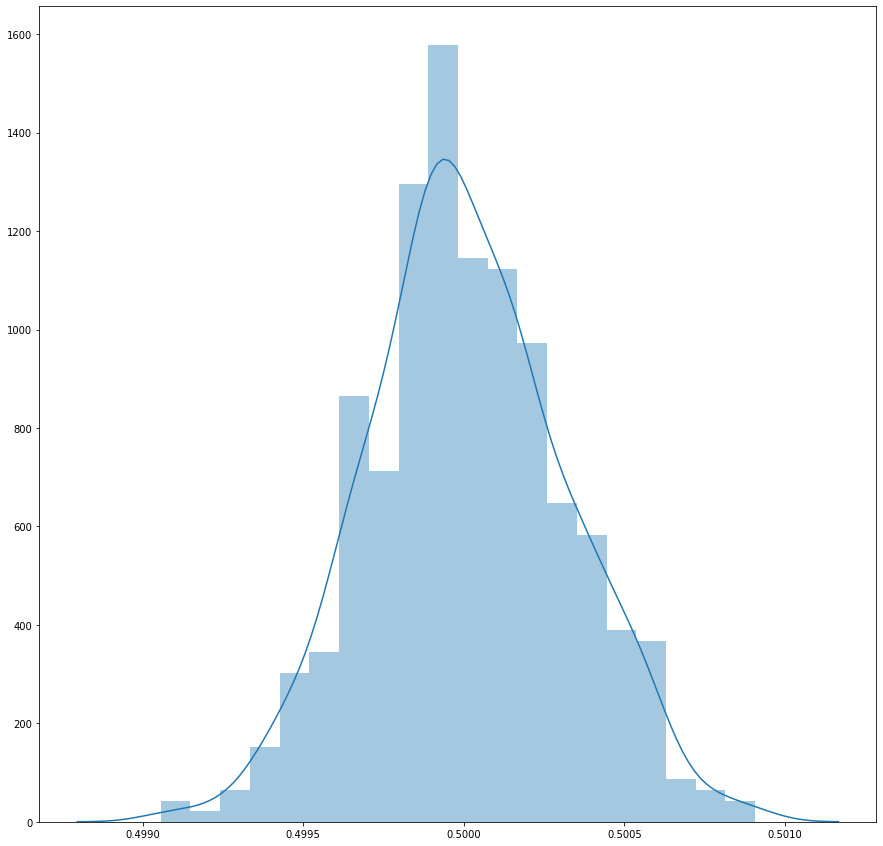

In [12]:
plt.figure(figsize=(15, 15))
sns.distplot(df['target'].values[1:])

----- Data Statistics -----
Share for value "black": 0.5722093100072668
Share for value "white": 0.4277906899927331
---------------------------


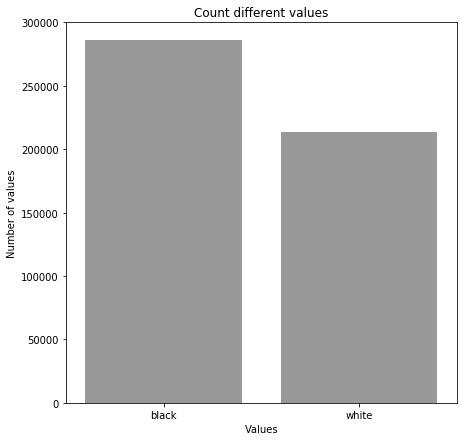

In [17]:
def task_3(counter, x, y, shari):
    first = random.choice(shari)
    second = random.choice(shari[:shari.index(first)] + shari[shari.index(first) + 1:])
    if second == 'white':
        counter.append(first) 
        x.append(first)
        y.append(second)

counter = stat_method(function=ft.partial(task_3, shari=['white', 'white', 'white', 'white', 'black', 'black', 'black', 'black']), iterations=1000000)
stats(counter['target'])
count_visualise(counter, type='one')

In [266]:
def generate_uniform(number_of_elements):
    return np.random.uniform(0, 1, (1, number_of_elements))


def run_experiment(number_of_elements=1000, train_size_ratio=0.1, data_generator=generate_uniform):
    data = data_generator(number_of_elements)
    train_index = int(round(number_of_elements * train_size_ratio))
    train_data, test_data = data[:, :train_index + 1], data[:, train_index - 1:]
    train_max, data_max = train_data.max(), data.max()
    tmp_example = None
    for index, example in enumerate(test_data.flatten()):
        if example >= train_max:
            tmp_example = example
            break
    return tmp_example == data_max


def make_choice(choice_runs=1000000, train_ratios=np.linspace(0.1, 0.9, 50)):
    results = []
    for index, ratio in enumerate(train_ratios):
        success = 0 
        for _ in range(choice_runs):
            success += int(run_experiment(train_size_ratio=ratio))
        results.append(success)
    return train_ratios, results


def plot_results(ratios, results):
    plt.plot(ratios, results)

In [ ]:
ratios, results = make_choice()
plot_results(ratios, results)